# **Clustering Analysis**

In [136]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

Ora carico il dataset normale:

In [137]:
dataframe = pd.read_csv('dataTS.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [138]:
dataframe.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
0,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
1,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
3,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [139]:
dataframe.dtypes

DateTime         object
CO(GT)          float64
PT08.S1(CO)     float64
NOx(GT)         float64
NO2(GT)         float64
PT08.S4(NO2)    float64
T               float64
Weekend           int64
dtype: object

ora vado a convertire DateTime in formato data e poi la metto come indice:

In [140]:
dataframe['DateTime']=pd.to_datetime(dataframe.DateTime)

In [141]:
dataframe.dtypes

DateTime        datetime64[ns]
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekend                  int64
dtype: object

In [142]:
dataframe.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
0,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
1,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
3,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [143]:
dataframe.shape

(744, 8)

Ora che abbiamo DateTime nel formato giusto settiamolo come Indice:

In [144]:
dataframe = dataframe.set_index(['DateTime'])


In [145]:
dataframe.head()

,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
DateTime,,,,,,,
2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


## Create Dataset 4 Clustering Analysis

as explained in the Univariate section we are going to analyze only the CO (GT) variable taking into account the last week of October to avoid anomalies


In [146]:
dfCluster = dataframe[['CO(GT)']]
dfCluster.head()

,CO(GT)
DateTime,
2004-10-01 00:00:00,1.9
2004-10-01 01:00:00,1.6
2004-10-01 02:00:00,1.3
2004-10-01 03:00:00,0.8
2004-10-01 04:00:00,0.6


In [147]:
dfCluster.tail()

,CO(GT)
DateTime,
2004-10-31 19:00:00,4.7
2004-10-31 20:00:00,4.1
2004-10-31 21:00:00,4.1
2004-10-31 22:00:00,2.7
2004-10-31 23:00:00,2.6


In [148]:
dfCluster.shape

(744, 1)

For the clustering of the times series of the variable CO(GT) we will work on the series without noise (come abbiamo rimosso in univariata) and we will use three different techniques:
- Shape-based
- Compressed-based and
- Approximation-based.

In [149]:
dfCluster_denoised = ((dfCluster-dfCluster.mean())/dfCluster.std()).rolling(window=180).mean()
ts = dfCluster_denoised.loc['2004-10-25':'2004-10-31']
sma = ts.rolling(window = 180).mean()
ts_shift = ts - sma

se volgiamo plottare qua andamento variabile CO(GT) senza rumore nella settimana considerata, è lo stesso grafico univariata perchè andamento è lo stesso, ma ho messo se servisse grafico:

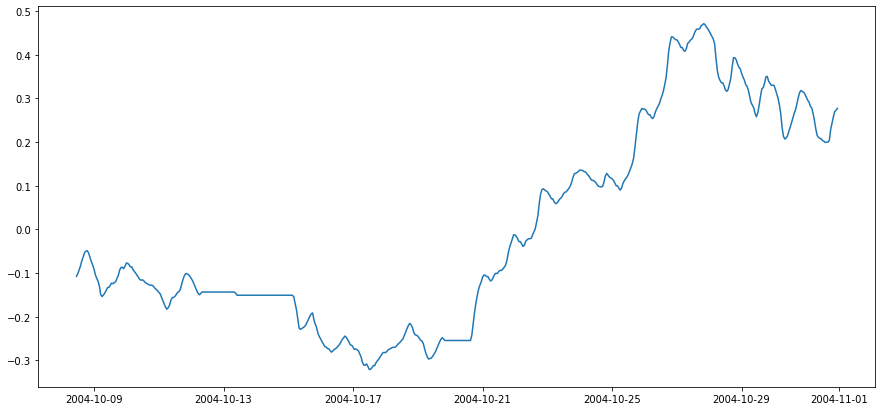

In [150]:
# CO(GT) senza rumore andamento in ultima settimana ottobre
plt.figure(figsize=(15,7))
plt.plot(dfCluster_denoised)

Ora dobbiamo preparare array da dare alle 3 tecniche di clustering, questo non penso serva scriverlo nel report , oppure basta dire che abbiamo preparato i dati per il clustering:

In [159]:
day_1 = dfCluster_denoised['2004-10-25']
day_2 = dfCluster_denoised['2004-10-26']
day_3 = dfCluster_denoised['2004-10-27']
day_4 = dfCluster_denoised['2004-10-28']
day_5 = dfCluster_denoised['2004-10-29']
day_6 = dfCluster_denoised['2004-10-30']
day_7 = dfCluster_denoised['2004-10-31']

In [160]:
day_1.reset_index(drop=True, inplace=True)
day_2.reset_index(drop=True, inplace=True)
day_3.reset_index(drop=True, inplace=True)
day_4.reset_index(drop=True, inplace=True)
day_5.reset_index(drop=True, inplace=True)
day_6.reset_index(drop=True, inplace=True)
day_7.reset_index(drop=True, inplace=True)

In [161]:
day1=day_1.values
day2=day_2.values
day3=day_3.values
day4=day_4.values
day5=day_5.values
day6=day_6.values
day7=day_7.values


In [162]:
A=np.array(day1)
B=np.array(day2)
C=np.array(day3)
D=np.array(day4)
E=np.array(day5)
F=np.array(day6)
G=np.array(day7)


In [164]:
ArrayCluster=np.array([A,B,C,D,E,F,G])


In [165]:
ArrayCluster.shape

(7, 24, 1)

## Shape-Based Clustering

Plottiamo il nostro array sul quale fare clustering Shape-based in due dimensioni

In [167]:
pip install tslearn


In [168]:
from tslearn.clustering import TimeSeriesKMeans


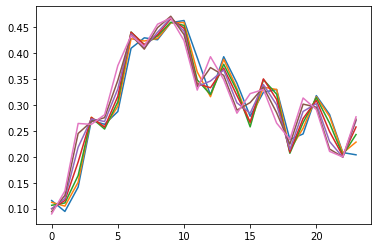

In [169]:
plt.plot(ArrayCluster.reshape(ArrayCluster.shape[1], ArrayCluster.shape[0]))
plt.show()

as a first approach with the Shaped based clustering we tried the following settings:
- n_clusters=2
- metric='euclidean'
- verbose=1

In [170]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean",verbose=1)
km.fit(ArrayCluster)

0.139 --> 0.095 --> 0.095 --> 


TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=2, n_init=1, n_jobs=None,
                 random_state=None, tol=1e-06, verbose=1)

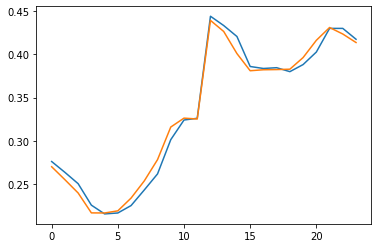

In [171]:
plt.plot(km.cluster_centers_.reshape(ArrayCluster.shape[1], 2))
plt.show()

In [172]:
km.labels_


array([0, 0, 1, 1, 0, 0, 0])

In [173]:
km.inertia_


0.0947670271095054

Test other options, in particualt a different metric "dtw":

In [174]:
km_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw",verbose=1)
km_dtw.fit(ArrayCluster)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0.085 --> 0.045 --> 0.045 --> 0.045 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=2, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-06, verbose=1)

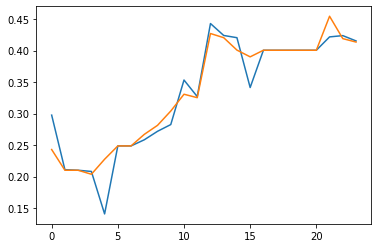

In [176]:
plt.plot(km_dtw.cluster_centers_.reshape(ArrayCluster.shape[1], 2))
plt.show()

In [177]:
km_dtw.labels_


array([0, 0, 1, 1, 0, 0, 0])

In [178]:
km_dtw.inertia_


0.045314057032478185

Ricapitolando, ShapedBased provato 2 clusters e con metrica euclidean la prima volta e la metrica dtw la seconda volta , abbiamo le labels di entrambi e il valore di inertia di entrambi (capire se questo valore è meglio che sia alto o basso) -> **SPOILER: io ho capito che+ bassa è meglio è** 

## Compressed-Based

In [179]:
import zlib
import string

In [180]:
from sklearn.metrics import pairwise_distances


In [181]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [187]:
Compressed = pairwise_distances(ArrayCluster.reshape(ArrayCluster.shape[0], ArrayCluster.shape[1]), metric=cdm_dist)


In [188]:
Compressed.shape


(7, 7)

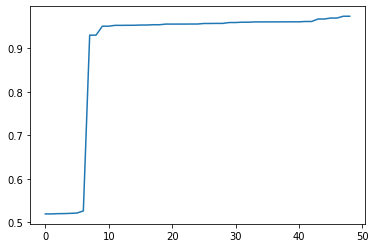

In [189]:
plt.plot(sorted(Compressed.ravel()))
plt.show()

In [185]:
from sklearn.cluster import DBSCAN


Parametri del DBscan sul compressed da dire :

In [190]:
dbscan = DBSCAN(eps=1, min_samples=5, metric='precomputed')
dbscan.fit(Compressed)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [191]:
dbscan.labels_


array([0, 0, 0, 0, 0, 0, 0])

## Approximation based

In [192]:
pip install tslearn


In [193]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans

impostazione parametri del Approximation based:
- n_paa-segmentes=15
- metric =[euclidiean, dtw]

In [195]:
n_paa_segments = 15
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ArrayCluster_paa = paa.fit_transform(ArrayCluster)

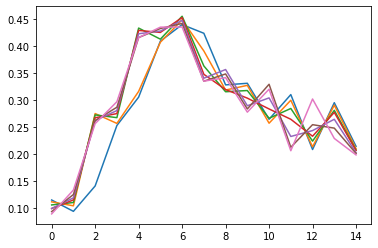

In [196]:
plt.plot(ArrayCluster_paa.reshape(ArrayCluster_paa.shape[1], ArrayCluster_paa.shape[0]))
plt.show()

segnare impostazioni del Kmeans con approccio Approximation based:

In [197]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=7)
km.fit(ArrayCluster_paa)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=7,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=2, n_init=1, n_jobs=None,
                 random_state=None, tol=1e-06, verbose=0)

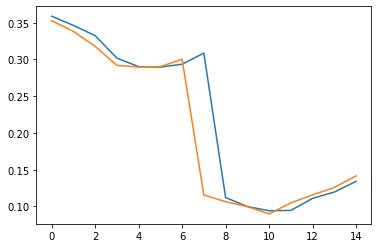

In [198]:
plt.plot(km.cluster_centers_.reshape(ArrayCluster_paa.shape[1], 2))
plt.show()

In [199]:
km.cluster_centers_.shape


(2, 15, 1)

In [200]:
km.labels_


array([1, 0, 0, 0, 0, 0, 0])

In [201]:
km.inertia_


0.06460215365138001

provo altra metrica, segnare parametri usati:

In [202]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=7)
km.fit(ArrayCluster_paa)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=7,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=2, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-06, verbose=0)

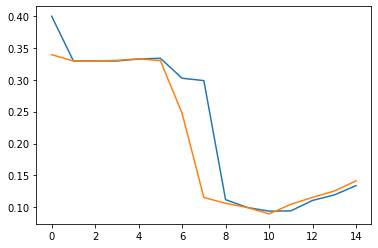

In [203]:
plt.plot(km.cluster_centers_.reshape(ArrayCluster_paa.shape[1], 2))
plt.show()

In [204]:
km.labels_


array([1, 0, 0, 0, 0, 0, 0])

In [205]:
km.inertia_


0.0422840997910788

Discorso finale:
Magari diciamo tutto quello che abbiamo provato senza stare a mettere tutti i grafici di ogni cosa, riportando le varie combinazioni di parametri, e magari potremmo fare una tabellina finale con tutti i valori di **inertia** e dire quale è stato il migliore e con quali paramentri (dovrebbe essere Approximation based con Kmeans, 2 clusters , metrica 'dtw' e maxiter=7) 

Vince chi ha inertia minore